In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of latitude and lingitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
coordinates = list(lats_lngs)

In [4]:
for location in coordinates:
    print(f"Latitude: {location[0]}, Longitude: {location[1]}")

Latitude: 28.52418141407972, Longitude: -27.71013788578719
Latitude: -4.234218096904371, Longitude: 116.82398187626114
Latitude: -2.5020345874211785, Longitude: 19.106041772427147
Latitude: 63.719897627214976, Longitude: 139.94207338355648
Latitude: -42.92825153679427, Longitude: -172.61520133925194
Latitude: -76.76921181478487, Longitude: -11.178170776320172
Latitude: 17.587978663406417, Longitude: 135.1745461383651
Latitude: 83.89730452109802, Longitude: -88.36749233438347
Latitude: 20.775245742809005, Longitude: -25.976788278169863
Latitude: 74.60495874480489, Longitude: -153.91010012246446
Latitude: 63.826768941637965, Longitude: 177.6244909670486
Latitude: -83.76104412001771, Longitude: -166.50265261645978
Latitude: -66.90346654715837, Longitude: 79.6820702189139
Latitude: 86.50103630183924, Longitude: -78.95704330763684
Latitude: -82.163628681491, Longitude: -39.073589877462496
Latitude: 21.99303408518861, Longitude: 109.21643498017352
Latitude: 6.904435357368087, Longitude: -65.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Empty city list
cities = []

# loop through all coordiantes
for location in coordinates:
    city = citipy.nearest_city(location[0], location[1]).city_name
    if city not in cities:
        cities.append(city)
    
# print the ciy list
print(cities)

# print the city count
print(len(cities))

['ponta delgada', 'martapura', 'inongo', 'ust-nera', 'vaini', 'cape town', 'airai', 'qaanaaq', 'ponta do sol', 'barrow', 'anadyr', 'mataura', 'busselton', 'ushuaia', 'lianzhou', 'ciudad bolivar', 'butaritari', 'cabo san lucas', 'luocheng', 'baghmara', 'upernavik', 'birao', 'ancud', 'andevoranto', 'wajima', 'paucartambo', 'hobart', 'ziarat', 'taolanaro', 'palabuhanratu', 'saint-pierre', 'oeiras', 'talnakh', 'illoqqortoormiut', 'korla', 'lagoa', 'vrangel', 'chuy', 'taltal', 'bluff', 'pisco', 'kununurra', 'saint george', 'saldanha', 'shenjiamen', 'khatanga', 'albany', 'deputatskiy', 'leningradskiy', 'mahebourg', 'bengkulu', 'ribeira grande', 'sao joao da barra', 'chkalovskoye', 'gazojak', 'ostrovnoy', 'ostersund', 'georgetown', 'bairiki', 'cidreira', 'hermanus', 'hasaki', 'rikitea', 'zapolyarnyy', 'punta arenas', 'belushya guba', 'north bend', 'tuktoyaktuk', 'sorvag', 'pauna', 'wencheng', 'port lincoln', 'turtas', 'chokurdakh', 'jamestown', 'puerto ayora', 'lorengau', 'tasiilaq', 'lokosov

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time

from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a98119a7c21e474f3cde09aa9f1234fa


In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of logging
print("Beginning Data Retrieval              ")
print("--------------------------------------")

# Initialize the counters
record_count = 1
set_count = 1

# Looping through cities
for city in range(len(cities)):
    
    # creating groups of 50
    if(city % 50 == 0 and city >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)
        
    # Create city url list
    city_url = url + "&q=" + cities[city].replace(" ","+")
    
    # Log the URl, record and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count}: {cities[city]}")
    record_count += 1
    
    # Request the JSON in the try loop
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_datetime = city_weather["dt"]
        
        # Convert the JSON date to ISO format
        city_date = datetime.utcfromtimestamp(city_datetime).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information to data list
        city_data.append({"City": cities[city],
                         "Latitude": city_lat,
                         "Longitude": city_lon,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # Log an exception if error occurs in fetching the city
    except:
        print(f"City {cities[city]}not found. Skipping.......")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval              
--------------------------------------
Processing Record 1 of Set 1: ponta delgada
Processing Record 2 of Set 1: martapura
Processing Record 3 of Set 1: inongo
Processing Record 4 of Set 1: ust-nera
Processing Record 5 of Set 1: vaini
Processing Record 6 of Set 1: cape town
Processing Record 7 of Set 1: airai
Processing Record 8 of Set 1: qaanaaq
Processing Record 9 of Set 1: ponta do sol
Processing Record 10 of Set 1: barrow
Processing Record 11 of Set 1: anadyr
Processing Record 12 of Set 1: mataura
Processing Record 13 of Set 1: busselton
Processing Record 14 of Set 1: ushuaia
Processing Record 15 of Set 1: lianzhou
Processing Record 16 of Set 1: ciudad bolivar
Processing Record 17 of Set 1: butaritari
Processing Record 18 of Set 1: cabo san lucas
Processing Record 19 of Set 1: luocheng
Processing Record 20 of Set 1: baghmara
Processing Record 21 of Set 1: upernavik
Processing Record 22 of Set 1: birao
Processing Record 23 of Set 1: ancud
Proce

Processing Record 40 of Set 4: nioro
Processing Record 41 of Set 4: lavrentiya
Processing Record 42 of Set 4: slave lake
Processing Record 43 of Set 4: lichinga
Processing Record 44 of Set 4: dedza
Processing Record 45 of Set 4: boden
Processing Record 46 of Set 4: beyneu
Processing Record 47 of Set 4: verkhoyansk
Processing Record 48 of Set 4: tura
Processing Record 49 of Set 4: paamiut
Processing Record 50 of Set 4: asfi
Processing Record 1 of Set 5: belyy yar
Processing Record 2 of Set 5: pevek
Processing Record 3 of Set 5: provideniya
Processing Record 4 of Set 5: cherskiy
Processing Record 5 of Set 5: port-gentil
Processing Record 6 of Set 5: lolua
City loluanot found. Skipping.......
Processing Record 7 of Set 5: ryotsu
Processing Record 8 of Set 5: buala
Processing Record 9 of Set 5: warrington
Processing Record 10 of Set 5: alta floresta
Processing Record 11 of Set 5: gurupa
Processing Record 12 of Set 5: grafton
Processing Record 13 of Set 5: broome
Processing Record 14 of Set

Processing Record 30 of Set 8: rovinj
Processing Record 31 of Set 8: itamaraca
Processing Record 32 of Set 8: padilla
Processing Record 33 of Set 8: amderma
City amdermanot found. Skipping.......
Processing Record 34 of Set 8: sobolevo
Processing Record 35 of Set 8: kupang
Processing Record 36 of Set 8: padang
Processing Record 37 of Set 8: galesong
Processing Record 38 of Set 8: yar-sale
Processing Record 39 of Set 8: xuddur
Processing Record 40 of Set 8: la fria
Processing Record 41 of Set 8: khorramshahr
Processing Record 42 of Set 8: moose factory
Processing Record 43 of Set 8: san cristobal
Processing Record 44 of Set 8: kangaatsiaq
Processing Record 45 of Set 8: qaqortoq
Processing Record 46 of Set 8: srivardhan
Processing Record 47 of Set 8: codrington
Processing Record 48 of Set 8: kavaratti
Processing Record 49 of Set 8: tessalit
Processing Record 50 of Set 8: fortuna
Processing Record 1 of Set 9: ode
Processing Record 2 of Set 9: tabuk
Processing Record 3 of Set 9: aksha
Proc

Processing Record 13 of Set 12: derzhavinsk
Processing Record 14 of Set 12: vila franca do campo
Processing Record 15 of Set 12: mbanza-ngungu
Processing Record 16 of Set 12: kopavogur
Processing Record 17 of Set 12: kiunga
Processing Record 18 of Set 12: uvat
Processing Record 19 of Set 12: evensk
Processing Record 20 of Set 12: abha
Processing Record 21 of Set 12: pietermaritzburg
Processing Record 22 of Set 12: rawannawi
City rawannawinot found. Skipping.......
Processing Record 23 of Set 12: capao da canoa
Processing Record 24 of Set 12: vestmanna
Processing Record 25 of Set 12: carnarvon
Processing Record 26 of Set 12: puerto gaitan
Processing Record 27 of Set 12: mega
Processing Record 28 of Set 12: poya
Processing Record 29 of Set 12: duzce
Processing Record 30 of Set 12: barra
Processing Record 31 of Set 12: margate
Processing Record 32 of Set 12: rodniki
Processing Record 33 of Set 12: rocky mountain house
Processing Record 34 of Set 12: bahia blanca
Processing Record 35 of Se

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(30)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta delgada,37.7333,-25.6667,63.50,82,75,11.50,PT,2021-12-29 19:51:57
1,martapura,-3.4167,114.8500,77.09,94,90,5.75,ID,2021-12-29 19:51:57
2,inongo,-1.9500,18.2667,75.42,75,100,3.51,CD,2021-12-29 19:51:58
3,ust-nera,64.5667,143.2000,-38.18,100,100,4.03,RU,2021-12-29 19:51:58
4,vaini,-21.2000,-175.2000,80.76,89,40,3.44,TO,2021-12-29 19:51:58
5,cape town,-33.9258,18.4232,64.89,72,20,3.00,ZA,2021-12-29 19:51:59
6,airai,-8.9266,125.4092,60.01,90,100,1.50,TL,2021-12-29 19:51:59
7,qaanaaq,77.4840,-69.3632,-4.36,70,100,1.03,GL,2021-12-29 19:52:00
8,ponta do sol,32.6667,-17.1000,66.83,83,3,7.05,PT,2021-12-29 19:52:00
9,barrow,71.2906,-156.7887,-16.58,76,40,10.36,US,2021-12-29 19:52:01


In [17]:
new_column_order = ["City", "Country", "Date", "Latitude", "Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,ponta delgada,PT,2021-12-29 19:51:57,37.7333,-25.6667,63.50,82,75,11.50
1,martapura,ID,2021-12-29 19:51:57,-3.4167,114.8500,77.09,94,90,5.75
2,inongo,CD,2021-12-29 19:51:58,-1.9500,18.2667,75.42,75,100,3.51
3,ust-nera,RU,2021-12-29 19:51:58,64.5667,143.2000,-38.18,100,100,4.03
4,vaini,TO,2021-12-29 19:51:58,-21.2000,-175.2000,80.76,89,40,3.44
...,...,...,...,...,...,...,...,...,...
546,nuuk,GL,2021-12-29 19:57:08,64.1835,-51.7216,2.21,72,99,7.05
547,novokizhinginsk,RU,2021-12-29 19:57:08,51.6115,109.5917,-7.55,98,27,4.36
548,biloxi,US,2021-12-29 19:57:09,30.3960,-88.8853,81.55,88,90,8.05
549,krasnoarmeysk,RU,2021-12-29 19:57:09,51.0239,45.6969,7.07,95,100,12.24


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Latitude"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

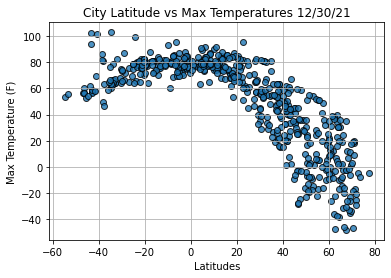

In [23]:
# Import time module
import time

# Build the scatter plot for lat vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temperatures "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

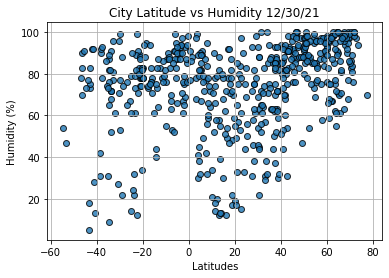

In [24]:
# Build the scatter plot for lat vs Humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

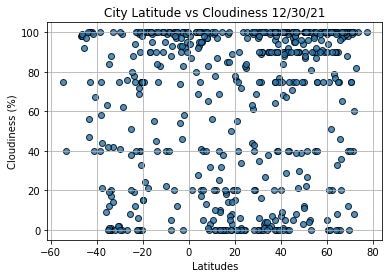

In [25]:
# Build the scatter plot for lat vs Cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

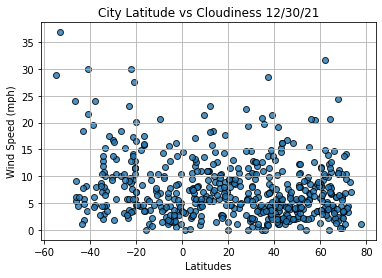

In [26]:
# Build the scatter plot for lat vs Wind Speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker ="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                      ushuaia
Country                        AR
Date          2021-12-29 19:52:02
Latitude                    -54.8
Longitude                   -68.3
Max Temp                    53.26
Humidity                       54
Cloudiness                     75
Wind Speed                  28.77
Name: 13, dtype: object

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Latitude"] < 0)]

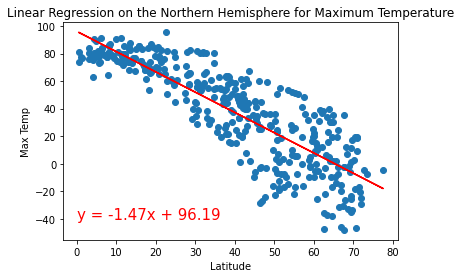

In [40]:
north_x_values = northern_hemi_df["Latitude"]
north_y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(north_x_values,north_y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0,-40))

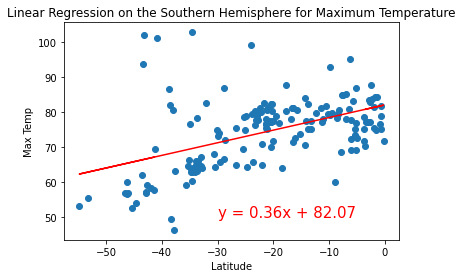

In [43]:
south_x_values = southern_hemi_df["Latitude"]
south_y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(south_x_values,south_y_values,"Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-30,50))

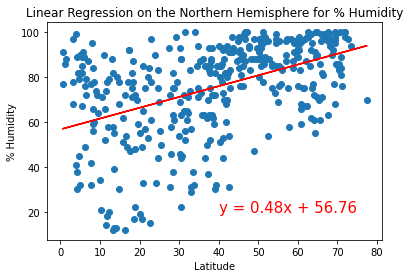

In [48]:
north_x_values = northern_hemi_df["Latitude"]
north_y_humid_values = northern_hemi_df["Humidity"]

plot_linear_regression(north_x_values,north_y_humid_values,"Linear Regression on the Northern Hemisphere for % Humidity", "% Humidity", (40,20))

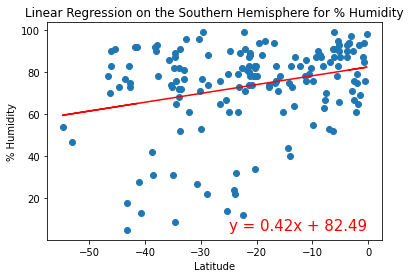

In [52]:
south_x_values = southern_hemi_df["Latitude"]
south_y_humid_values = southern_hemi_df["Humidity"]

plot_linear_regression(south_x_values,south_y_humid_values,"Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-25,5))

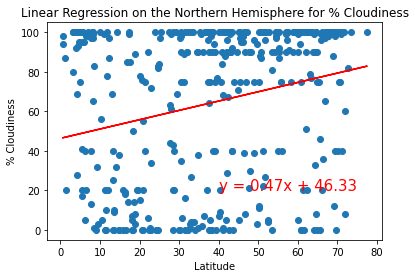

In [53]:
north_x_values = northern_hemi_df["Latitude"]
north_y_cloud_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(north_x_values,north_y_cloud_values,"Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness", (40,20))

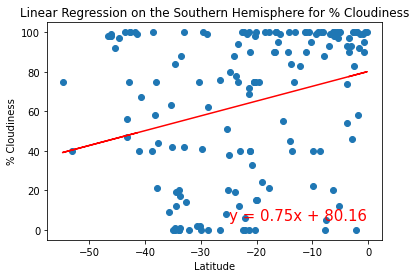

In [60]:
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-25,5))

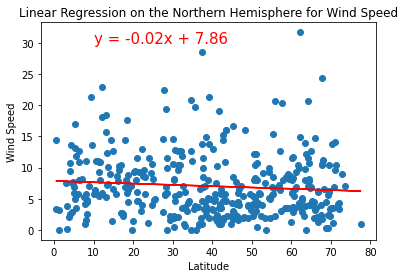

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))

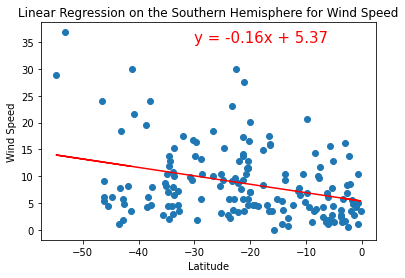

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,35))